# AR(p) Parameter Estimation

The $\text{AR}(p)$ process is defined by,

$
\begin{align}
X_t = \sum_{i=1}^p \varphi_i X_{t-i} + \varepsilon_{t}
\end{align}
$

where,

$
\begin{align}
\varepsilon_t \sim \text{Normal}(0, \sigma^2)
\end{align}
$

The Yule-Walker equations are relate the AR(p) parameters $\varphi_i$ to the autocorrelation function. If zero mean is</br>
assumed it follows that,

$
\begin{align}
\rho_n = \frac{\text{E}[X_t X_{t-n}]}{\text{E}[X_t^2]}
\end{align}
$

The autocorrelation functions can be shown to have the following properties,

$
\begin{align}
&\rho_0 = 1 \\
&\rho_n \leq 1 \\
&\rho_n = \rho_{-n}
\end{align}
$

Define the matrices,

$
\begin{align}
\hat{r} =
\begin{bmatrix}
\rho_1 \\
\rho_2 \\
\rho_3 \\
\vdots \\
\rho_{n-1} \\
\rho_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{\Phi} =
\begin{bmatrix}
\varphi_1 \\
\varphi_2 \\
\varphi_3 \\
\vdots \\
\varphi_{n-1} \\
\varphi_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{R} =
\begin{bmatrix}
1 & \rho_1 & \rho_2 & \cdots & \rho_{n-2} & \rho_{n-1} \\
\rho_1 & 1 & \rho_1 & \cdots & \rho_{n-3} & \rho_{n-2} \\
\rho_2 & \rho_1 & 1 & \cdots & \rho_{n-4} & \rho_{n-3} \\
\vdots & \vdots  & \vdots & \ddots & \vdots & \vdots \\
\rho_{n-2} & \rho_{n-3} & \rho_{n-4} & \cdots & 1 & \rho_1 \\
\rho_{n-1} & \rho_{n-2} & \rho_{n-3} & \cdots & \rho_1 & 1 \\
\end{bmatrix}
\end{align}
$

Then the Yule-Walker equations are given by,

$
\begin{align}
\hat{\Phi} = \hat{R}^{-1} \hat{r}
\end{align}
$

## Examples

The Yule-Walker equations for $\text{AR}(1)$ is given by,

$
\begin{align}
\varphi_1 = \rho_1
\end{align}
$

This is the OLS solution.

For $\text{AR}(2)$,

$
\begin{align}
\varphi_1 &= \frac{\rho_1 - \rho_1 \rho_2}{1 - \rho_1^2} \\
\varphi_2 &= \frac{\rho_2 - \rho_1^2}{1 - \rho_1^2}
\end{align}
$

## Stationaity

Stationarity of an $\text{AR}(p)$ leads to convergence of the moments as $t \to \infty$. Recall the shift operator, $L$, defined by,

$
\begin{align}
&L X_t = X_{t-1} \\
&L^2 X_t = X_{t-2} \\
&L^3 X_t = X_{t-3} \\
&\vdots
\end{align}
$

An $\text{AR}(p)$ process can be written as,

$
\begin{align}
\varepsilon_t = (1 - \varphi L - \varphi^2 L^2 - \varphi^3 L^3 - \cdots - \varphi^p L^p) X_t
\end{align}
$

The characteristic equation is obtained by replacing $L$ with the variable $z$ and setting the result to zero,

$
\begin{align}
1 - \varphi z - \varphi^2 z^2 - \varphi^3 z^3 - \cdots - \varphi^p z^p = 0
\end{align}
$

Stationarity requires that $\lvert z \rvert > 1$. To see this consider $\text{AR}(1)$. The characteristic equation is,

$
\begin{align}
1 - \varphi z = 0
\end{align}
$

The solution is $z = \frac{1}{\varphi}$. It follows that stationarity requires,

$
\begin{align}
\lvert \varphi \rvert < 1
\end{align}
$

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (Func, Source, Est)
from lib import (stack, fpoints, fcurve)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
nsample = 1000

def comparison(φ_vals, σ, ylim, *params):
    title = "AR(p) Comparison Plot"
    labels = [f"φ={val}" for val in φ_vals] 
    scan = Source.AR.create_parameter_scan(*params)
    stack(scan, ylim=ylim, title=title, labels=labels)
    return scan

## Simulations

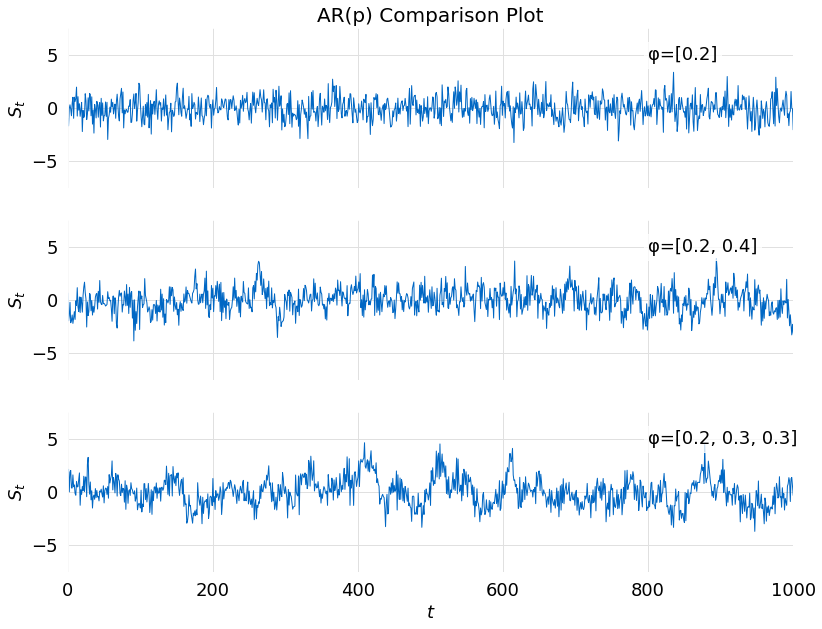

In [3]:
σ = 1.0
φ_vals = [[0.2], [0.2, 0.4], [0.2, 0.3, 0.3]]
params = [{"φ": φ, "σ": σ, "xmax": nsample} for φ in φ_vals]
ar = comparison(φ_vals, σ, [-7.5, 7.5], *params)

## Estimation of $\text{AR}(p)$ Parameters ($\sigma = 1$)

$\text{AR}(p)$ parameters are estimated using two methods. The Yule-Walker ACF and `statsmodels.tsa.arima_model.ARMA`

### AR(1) Example $\varphi = 0.2$

In [4]:
df = Func.PACF.apply(ar[0], nlags=1)
df.head()

,τ,ρ(τ)
1,1.0,0.141133


In [5]:
results = Est.AR.perform(ar[0], order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1411.144
Date:                Fri, 03 Jun 2022   AIC                           2828.288
Time:                        08:49:21   BIC                           2843.015
Sample:                             0   HQIC                          2833.885
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0014      0.037     -0.039      0.969      -0.073       0.070
ar.L1          0.1417      0.032      4.476      0.000       0.080       0.204
sigma2         0.9817      0.043     22.606      0.000       0.897       1.067
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.89
Prob(Q):                              0.88   Prob(JB):                         0.64
Heteroskedasticity (H):               1.10   Skew:                            -0.07
Prob(H) (two-sided):                  0.40   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
ar[0].attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '03/06/2022 08:49:21',
 'Type': <Source.AR: 'AR'>,
 'Name': 'AR(1)-Simulation-916c4776-c657-4fa2-bcfd-e60dbd57b7ff',
 'SchemaIterations': None,
 'AR': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2], 'σ': 1.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(1)': {'Type': <Est.AR: 'AR'>,
    'Const': {'Estimate': -0.0014358787241504955,
     'Error': 0.03656020552382264,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.14170744740384728,
      'Error': 0.031660540752331844,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'}],
    'Sigma2': {'Estimate': 0.9817469314154025,
     'Error': 0.04342810144318021,


### AR(2) Example $\varphi = [0.2, 0.4]$

In [7]:
df = Func.PACF.apply(ar[1], nlags=2)
df.head()

,τ,ρ(τ)
1,1.0,0.189017
2,2.0,0.396258


In [8]:
results = Est.AR.perform(ar[1], order=2)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1401.634
Date:                Fri, 03 Jun 2022   AIC                           2811.268
Time:                        08:49:21   BIC                           2830.903
Sample:                             0   HQIC                          2818.730
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0361      0.076     -0.474      0.635      -0.185       0.113
ar.L1          0.1901      0.029      6.465      0.000       0.132       0.248
ar.L2          0.4018      0.031     13.075      0.000       0.342       0.462
sigma2         0.9628      0.042     22.722      0.000       0.880       1.046
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.50
Prob(Q):                              0.84   Prob(JB):                         0.78
Heteroskedasticity (H):               1.12   Skew:                            -0.04
Prob(H) (two-sided):                  0.28   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
ar[1].attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '03/06/2022 08:49:21',
 'Type': <Source.AR: 'AR'>,
 'Name': 'AR(2)-Simulation-4ed0652c-3bf5-4862-bb24-12fc3ff252b0',
 'SchemaIterations': None,
 'AR': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2, 0.4], 'σ': 1.0},
  'Description': 'AR(2)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(2)': {'Type': <Est.AR: 'AR'>,
    'Const': {'Estimate': -0.036099122049555885,
     'Error': 0.07610702515609079,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.1900992391995275,
      'Error': 0.029402883454147703,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'},
     {'Estimate': 0.4018162454764495,
      'Error': 0.030731885134025985,
     

### AR(3) Example $\varphi = [0.2, 0.3, 0.3]$

In [10]:
df = Func.PACF.apply(ar[2], nlags=3)
df.head()

,τ,ρ(τ)
1,1.0,0.203309
2,2.0,0.325458
3,3.0,0.286415


In [11]:
results = Est.AR.perform(ar[2], order=3)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -1377.346
Date:                Fri, 03 Jun 2022   AIC                           2764.693
Time:                        08:49:21   BIC                           2789.237
Sample:                             0   HQIC                          2774.021
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0179      0.162      0.110      0.912      -0.300       0.336
ar.L1          0.2016      0.030      6.715      0.000       0.143       0.260
ar.L2          0.3275      0.029     11.456      0.000       0.271       0.383
ar.L3          0.2876      0.031      9.254      0.000       0.227       0.349
sigma2         0.9167      0.042     22.006      0.000       0.835       0.998
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                 0.28
Prob(Q):                              0.60   Prob(JB):                         0.87
Heteroskedasticity (H):               1.13   Skew:                             0.03
Prob(H) (two-sided):                  0.27   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
ar[2].attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '03/06/2022 08:49:21',
 'Type': <Source.AR: 'AR'>,
 'Name': 'AR(3)-Simulation-38652273-c8af-4072-85cc-681faf709b3b',
 'SchemaIterations': None,
 'AR': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2, 0.3, 0.3], 'σ': 1.0},
  'Description': 'AR(3)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(3)': {'Type': <Est.AR: 'AR'>,
    'Const': {'Estimate': 0.01790682644244621,
     'Error': 0.1623606211116425,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.20157564841169023,
      'Error': 0.030019881729573667,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'},
     {'Estimate': 0.32746684312086405,
      'Error': 0.028585445894808954,
 

## Simulations $\sigma = 5.0$

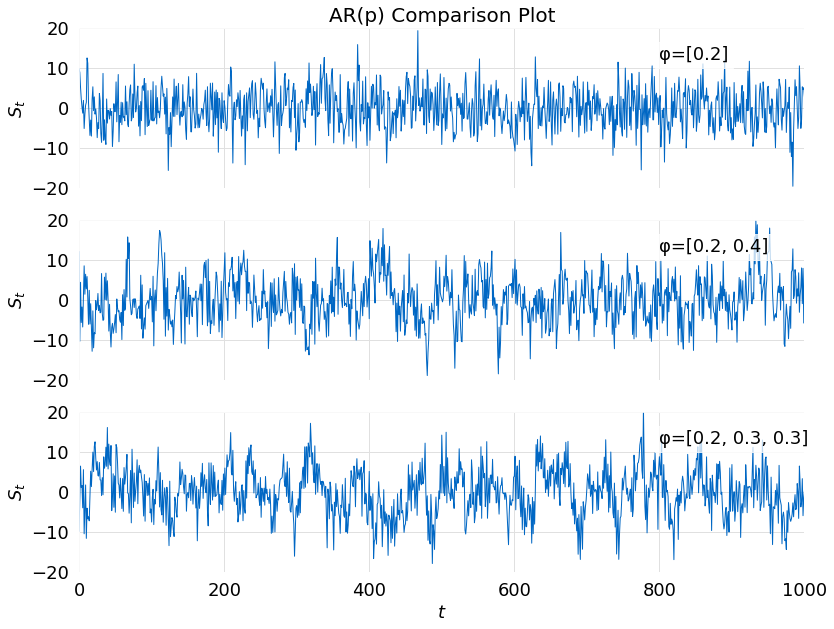

In [13]:
σ = 5.0
φ_vals = [[0.2], [0.2, 0.4], [0.2, 0.3, 0.3]]
params = [{"φ": φ, "σ": σ, "xmax": nsample} for φ in φ_vals]
ar = comparison(φ_vals, σ, [-20.0, 20.0], *params)

### AR(1) Example ($\varphi = 0.2$)

In [14]:
df = Func.PACF.apply(ar[0], nlags=1)
df.head()

,τ,ρ(τ)
1,1.0,0.167539


In [15]:
results = Est.AR.perform(ar[0], order=3)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -3013.349
Date:                Fri, 03 Jun 2022   AIC                           6036.699
Time:                        08:49:22   BIC                           6061.242
Sample:                             0   HQIC                          6046.026
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0482      0.188     -0.256      0.798      -0.417       0.321
ar.L1          0.1696      0.034      5.046      0.000       0.104       0.235
ar.L2         -0.0103      0.031     -0.327      0.744      -0.072       0.051
ar.L3          0.0121      0.032      0.376      0.707      -0.051       0.075
sigma2        24.1144      1.078     22.367      0.000      22.001      26.227
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.24
Prob(Q):                              0.98   Prob(JB):                         0.89
Heteroskedasticity (H):               1.10   Skew:                            -0.03
Prob(H) (two-sided):                  0.38   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
ar[0].attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '03/06/2022 08:49:21',
 'Type': <Source.AR: 'AR'>,
 'Name': 'AR(1)-Simulation-412a7445-206d-472d-9703-a47ecf292024',
 'SchemaIterations': None,
 'AR': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2], 'σ': 5.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(3)': {'Type': <Est.AR: 'AR'>,
    'Const': {'Estimate': -0.048188426291865545,
     'Error': 0.1882286394994051,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.16961769882023534,
      'Error': 0.0336118282367768,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'},
     {'Estimate': -0.01026814993604526,
      'Error': 0.031407745397529954,
      'Est

### AR(2) Example ($\varphi = [0.2, 0.4]$)

In [17]:
df = Func.PACF.apply(ar[1], nlags=2)
df.head()

,τ,ρ(τ)
1,1.0,0.244347
2,2.0,0.383663


In [18]:
results = Est.AR.perform(ar[1], order=3)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -3043.717
Date:                Fri, 03 Jun 2022   AIC                           6097.434
Time:                        08:49:22   BIC                           6121.978
Sample:                             0   HQIC                          6106.762
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1893      0.436      0.434      0.664      -0.665       1.044
ar.L1          0.2334      0.029      7.990      0.000       0.176       0.291
ar.L2          0.3801      0.031     12.269      0.000       0.319       0.441
ar.L3          0.0235      0.032      0.726      0.468      -0.040       0.087
sigma2        25.6100      1.208     21.208      0.000      23.243      27.977
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.45
Prob(Q):                              0.95   Prob(JB):                         0.48
Heteroskedasticity (H):               0.98   Skew:                            -0.01
Prob(H) (two-sided):                  0.88   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
ar[1].attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '03/06/2022 08:49:21',
 'Type': <Source.AR: 'AR'>,
 'Name': 'AR(2)-Simulation-b4a45c29-b8ac-4fd5-bc01-0cafb28a39ec',
 'SchemaIterations': None,
 'AR': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2, 0.4], 'σ': 5.0},
  'Description': 'AR(2)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(3)': {'Type': <Est.AR: 'AR'>,
    'Const': {'Estimate': 0.18926196261024214,
     'Error': 0.43592740263253266,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.23343539681296832,
      'Error': 0.029214314014210093,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'},
     {'Estimate': 0.38010047337006236,
      'Error': 0.030981496135175337,
     

### AR(3) Example ($\varphi = [0.2, 0.3, 0.3]$)

In [20]:
df = Func.PACF.apply(ar[2], nlags=3)
df.head()

,τ,ρ(τ)
1,1.0,0.193644
2,2.0,0.245754
3,3.0,0.313278


In [21]:
results = Est.AR.perform(ar[2], order=3)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -2985.524
Date:                Fri, 03 Jun 2022   AIC                           5981.049
Time:                        08:49:22   BIC                           6005.593
Sample:                             0   HQIC                          5990.377
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1271      0.602     -0.211      0.833      -1.307       1.053
ar.L1          0.1925      0.031      6.174      0.000       0.131       0.254
ar.L2          0.2459      0.028      8.635      0.000       0.190       0.302
ar.L3          0.3138      0.029     10.807      0.000       0.257       0.371
sigma2        22.7922      1.009     22.584      0.000      20.814      24.770
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                 0.32
Prob(Q):                              0.54   Prob(JB):                         0.85
Heteroskedasticity (H):               1.20   Skew:                            -0.04
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
ar[2].attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '03/06/2022 08:49:21',
 'Type': <Source.AR: 'AR'>,
 'Name': 'AR(3)-Simulation-2960c603-d9c0-4d26-a4c2-dc64f03031bd',
 'SchemaIterations': None,
 'AR': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2, 0.3, 0.3], 'σ': 5.0},
  'Description': 'AR(3)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(3)': {'Type': <Est.AR: 'AR'>,
    'Const': {'Estimate': -0.12714415115805433,
     'Error': 0.6019928863558109,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.19250763902594464,
      'Error': 0.031181048150905635,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'},
     {'Estimate': 0.24590144667435185,
      'Error': 0.02847759960597836,
 